In [20]:
import pandas as pd

In [21]:
df = pd.read_csv("data/raw_data_healthcare.csv")
df.drop(columns="text_index", inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   medication  784 non-null    object 
 1   rate        743 non-null    float64
 2   comment     784 non-null    object 
dtypes: float64(1), object(2)
memory usage: 18.5+ KB


In [23]:
df.describe()

,rate
count,743.000000
mean,7.122476
std,3.352164
min,1.000000
25%,4.000000
50%,9.000000
75%,10.000000
max,10.000000


In [25]:
import pandas as pd

# Split the "medication" column into two columns
df[['drug', 'illness']] = df['medication'].str.split(' for ', 1, expand=True)
df = df.drop('medication', axis=1)

# Display the updated DataFrame

C:\Users\zofsm\AppData\Local\Temp\ipykernel_17752\258738192.py:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['drug', 'illness']] = df['medication'].str.split(' for ', 1, expand=True)


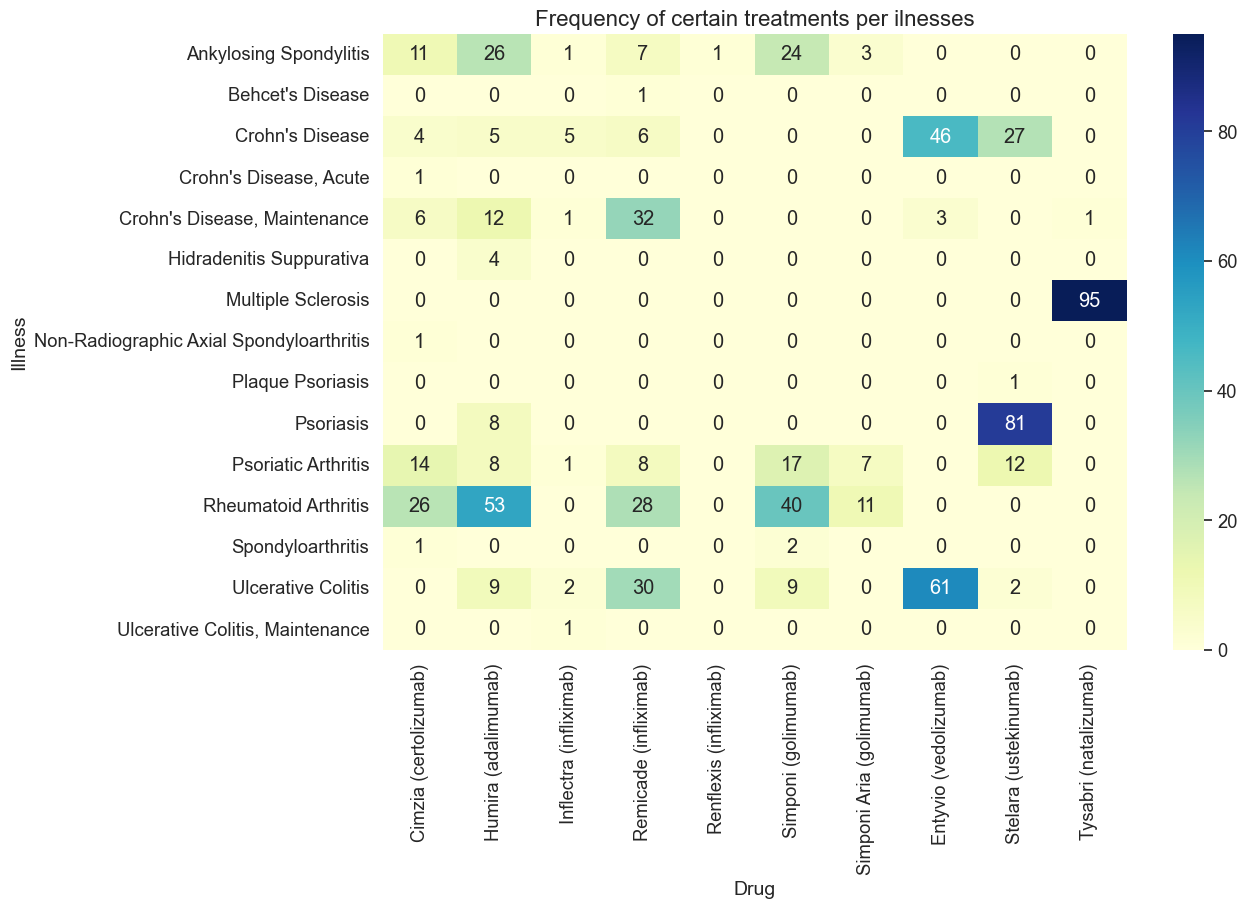

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with 'drug' and 'illness' columns
# Replace 'df' with the actual name of your DataFrame if it's different

# Group the DataFrame by 'illness' and 'drug' and count the number of rows
matrix_df = df.groupby(['illness', 'drug']).size().unstack(fill_value=0)

# Create a heatmap with colors
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.set(font_scale=1.2)  # Adjust the font size as needed
sns.heatmap(matrix_df, annot=True, fmt="d", cmap="YlGnBu")

# Add labels and title
plt.xlabel('Drug', fontsize=14)
plt.ylabel('Illness', fontsize=14)
plt.title('Frequency of certain treatments per ilnesses', fontsize=16)

# Save the image to a file (optional)
plt.savefig('matrix_heatmap.png', bbox_inches='tight')

# Show the heatmap
plt.show()


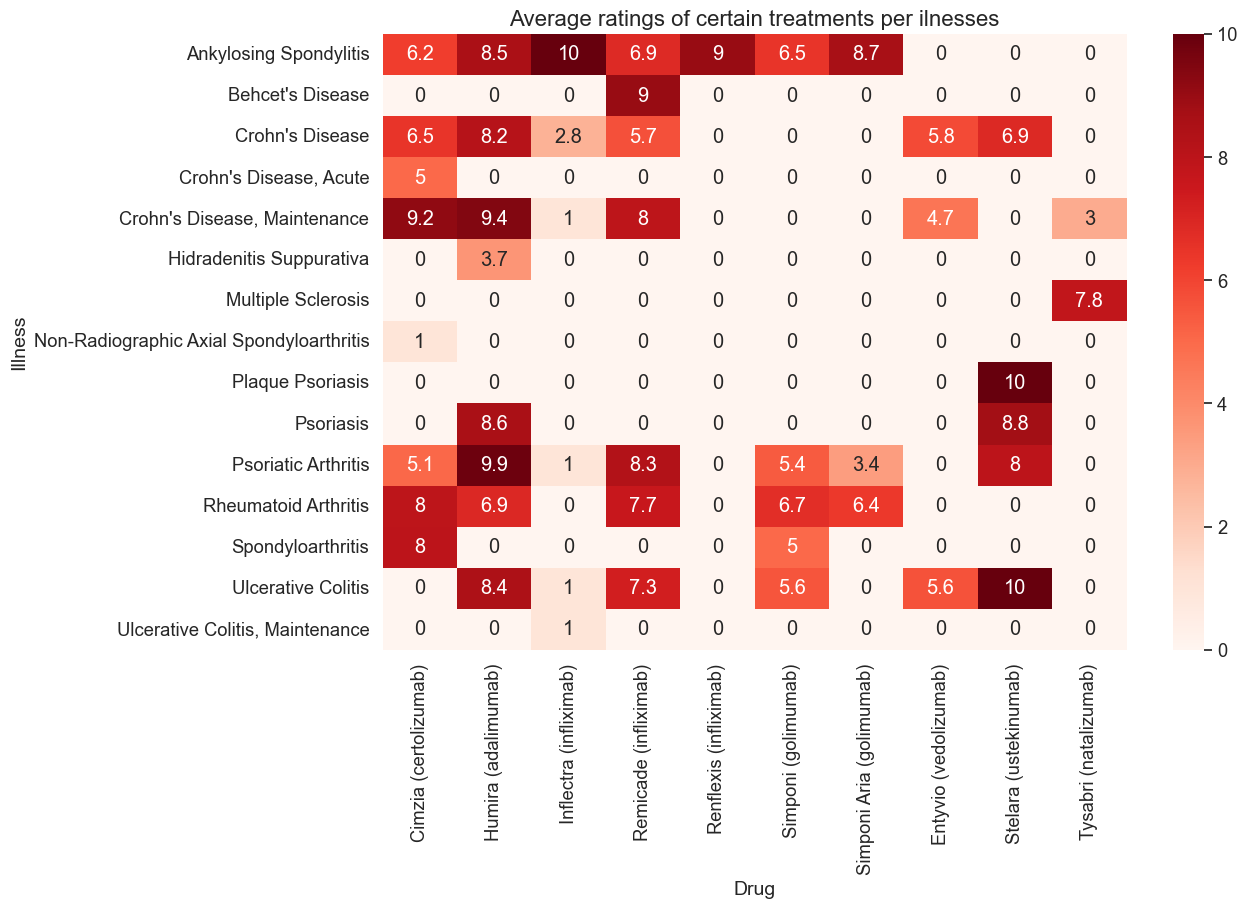

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with 'drug', 'illness', and 'rate' columns
# Replace 'df' with the actual name of your DataFrame if it's different

# Group the DataFrame by 'illness' and 'drug' and calculate the average rating
matrix_df = df.groupby(['illness', 'drug'])['rate'].mean().unstack(fill_value=0)

# Create a heatmap with red colors
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.set(font_scale=1.2)  # Adjust the font size as needed
sns.heatmap(matrix_df, annot=True, cmap="Reds")

# Add labels and title
plt.xlabel('Drug', fontsize=14)
plt.ylabel('Illness', fontsize=14)
plt.title('Average ratings of certain treatments per ilnesses', fontsize=16)

# Save the image to a file (optional)
plt.savefig('average_ratings_heatmap.png', bbox_inches='tight')

# Show the heatmap
plt.show()
